# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# **Load the Dataset**

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Exploratory Data Analysis (EDA)**

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: xlabel='Gender', ylabel='count'>

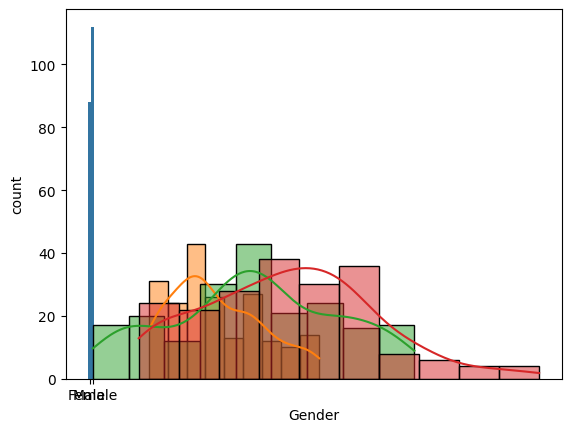

In [5]:

sns.countplot(x='Gender', data=df)


sns.histplot(df['Age'], kde=True)

sns.histplot(df['Spending Score (1-100)'], kde=True)

sns.histplot(df['Annual Income (k$)'], kde=True)


# **Data Preprocessing**

In [6]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [7]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Find the Optimal Number of Clusters (Elbow Method)**

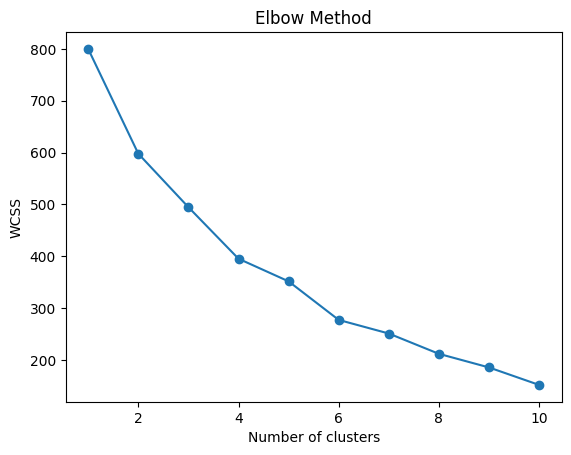

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# **Apply KMeans Clustering**

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans


# **Visualize the Clusters**

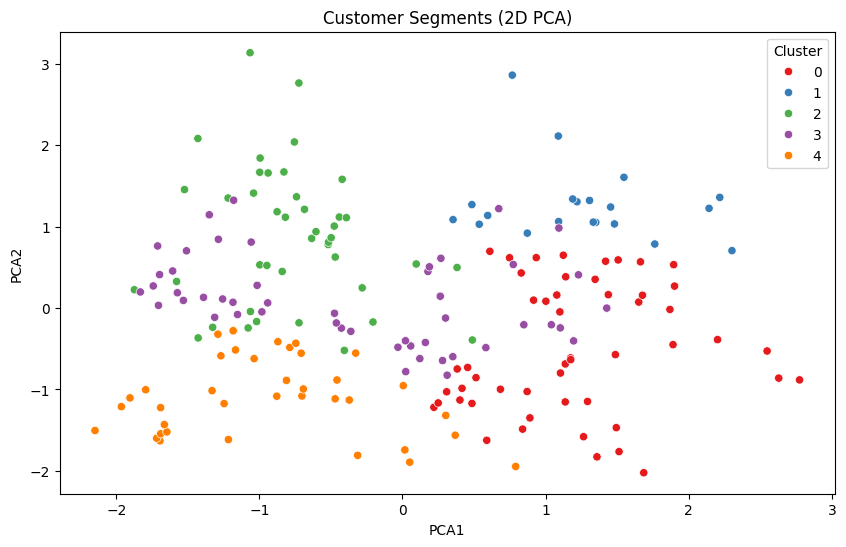

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df)
plt.title('Customer Segments (2D PCA)')
plt.show()


# **Analyze Clusters**

In [12]:
df.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
Cluster,,,,,,,
0,65.333333,0.490196,56.470588,46.098039,39.313725,1.196512,-0.509010
1,159.500000,0.000000,39.500000,85.150000,14.050000,1.254732,1.275794
2,100.809524,0.000000,28.690476,60.904762,70.238095,-0.771673,0.873183
3,151.510204,1.000000,37.897959,82.122449,54.448980,-0.373001,0.098257
4,50.526316,1.000000,27.315789,38.842105,56.210526,-0.932353,-1.080123


In [13]:
df.to_csv("customer_segments.csv", index=False)
